In [19]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [21]:
data = pd.read_csv('data/Finaltrain.csv')
data.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length,word_count,number_count,punctuation_count,stopword_count
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,346,61,0,3,21
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,1225,203,3,29,79
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,345,60,0,9,24
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,451,76,0,10,33
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,145,27,0,2,10


In [22]:
# randomize data
data = data.sample(frac=1).reset_index(drop=True) # Mezclar los datos

data.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length,word_count,number_count,punctuation_count,stopword_count
0,28ee3cf5921f,39c16e,One element is of the protagonist. This must b...,1.921071,1.879425,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to ...,856,153,0,19,67
1,b8c10b33f684,39c16e,One of the most important elements of an ideal...,1.140002,0.743618,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to ...,489,91,0,4,46
2,8ec808cbb9ce,ebad26,The meat packing industry would cover up meat ...,-0.693773,-0.490571,Summarize the various ways the factory would u...,Excerpt from The Jungle,With one member trimming beef ...,223,44,0,1,18
3,02f3987d58a6,3b9047,The structure of the ancient Egyptians system ...,2.124984,-0.467720,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,1678,275,0,53,106
4,3752d3f0f1ea,39c16e,An ideal tragedy should have a complex plot fu...,-1.072613,-0.999629,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to ...,193,34,0,3,15


## Preprocesamiento

In [23]:
# normalizar variables numéricas
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['text_length', 'word_count', 'number_count', 'punctuation_count', 'stopword_count']] = scaler.fit_transform(data[['text_length', 'word_count', 'number_count', 'punctuation_count', 'stopword_count']])

data.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length,word_count,number_count,punctuation_count,stopword_count
0,28ee3cf5921f,39c16e,One element is of the protagonist. This must b...,1.921071,1.879425,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to ...,0.193936,0.2096,0.0,0.121019,0.224832
1,b8c10b33f684,39c16e,One of the most important elements of an ideal...,1.140002,0.743618,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to ...,0.098014,0.1104,0.0,0.025478,0.154362
2,8ec808cbb9ce,ebad26,The meat packing industry would cover up meat ...,-0.693773,-0.490571,Summarize the various ways the factory would u...,Excerpt from The Jungle,With one member trimming beef ...,0.028489,0.0352,0.0,0.006369,0.060403
3,02f3987d58a6,3b9047,The structure of the ancient Egyptians system ...,2.124984,-0.467720,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,0.408782,0.4048,0.0,0.337580,0.355705
4,3752d3f0f1ea,39c16e,An ideal tragedy should have a complex plot fu...,-1.072613,-0.999629,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to ...,0.020648,0.0192,0.0,0.019108,0.050336


In [24]:
tokenizer = Tokenizer(num_words=10000)  # Limitar a las 10,000 palabras más comunes
tokenizer.fit_on_texts(data['text'] + ' ' + data['prompt_text'])

In [25]:
sequences = tokenizer.texts_to_sequences(data['text'] + ' ' + data['prompt_text'])

In [26]:
maxlen = 200  # Puedes ajustar este valor según la longitud promedio
X = pad_sequences(sequences, maxlen=maxlen)

In [27]:
# Combinar las etiquetas en una matriz
y = data[['content', 'wording']].values

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Separar las etiquetas después de la división
y_content_train = y_train[:, 0]
y_wording_train = y_train[:, 1]
y_content_test = y_test[:, 0]
y_wording_test = y_test[:,1]

## RNN

In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout


In [30]:
input_ = Input(shape=(maxlen,))

x = Embedding(input_dim=10000, output_dim=128, input_length=maxlen)(input_)

x = LSTM(256, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = LSTM(128, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = LSTM(64, return_sequences=False)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)

In [31]:
# Predicción de content
content_output = Dense(1, activation='linear', name='content')(x)

# Predicción de wording
wording_output = Dense(1, activation='linear', name='wording')(x)

In [32]:
optimizer = 'adam'
loss = 'mean_squared_error'
metrics = {
    'content': ['mae'],   # Métrica para la salida 'content'
    'wording': ['mae']    # Métrica para la salida 'wording'
}
epochs = 15
batch_size = 256


In [33]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [34]:
model = Model(inputs=input_, outputs=[content_output, wording_output])
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [35]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 200, 128)     1280000     ['input_2[0][0]']                
                                                                                                  
 lstm_3 (LSTM)                  (None, 200, 256)     394240      ['embedding_1[0][0]']            
                                                                                                  
 dropout_3 (Dropout)            (None, 200, 256)     0           ['lstm_3[0][0]']                 
                                                                                            

In [36]:
history = model.fit(
    X_train, 
    [y_content_train, y_wording_train], 
    validation_data=(X_test, [y_content_test, y_wording_test]), 
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/15
23/23 - 51s - loss: 2.0170 - content_loss: 0.9990 - wording_loss: 1.0180 - content_mae: 0.7691 - wording_mae: 0.8020 - val_loss: 1.4072 - val_content_loss: 0.6455 - val_wording_loss: 0.7618 - val_content_mae: 0.5619 - val_wording_mae: 0.6714 - 51s/epoch - 2s/step
Epoch 2/15
23/23 - 40s - loss: 1.1747 - content_loss: 0.4962 - wording_loss: 0.6784 - content_mae: 0.5387 - wording_mae: 0.6450 - val_loss: 0.8233 - val_content_loss: 0.2727 - val_wording_loss: 0.5506 - val_content_mae: 0.4134 - val_wording_mae: 0.5760 - 40s/epoch - 2s/step
Epoch 3/15
23/23 - 39s - loss: 0.8881 - content_loss: 0.3535 - wording_loss: 0.5346 - content_mae: 0.4515 - wording_mae: 0.5698 - val_loss: 0.7416 - val_content_loss: 0.2616 - val_wording_loss: 0.4800 - val_content_mae: 0.3983 - val_wording_mae: 0.5411 - 39s/epoch - 2s/step
Epoch 4/15
23/23 - 40s - loss: 0.7394 - content_loss: 0.2912 - wording_loss: 0.4481 - content_mae: 0.4108 - wording_mae: 0.5148 - val_loss: 0.6915 - val_content_loss: 0.2426 -

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_content_pred, y_wording_pred = model.predict(X_test)

print('MAE content:', mean_absolute_error(y_content_test, y_content_pred))
print('MSE content:', mean_squared_error(y_content_test, y_content_pred))
print('R2 content:', r2_score(y_content_test, y_content_pred))

print('\nMAE wording:', mean_absolute_error(y_wording_test, y_wording_pred))
print('MSE wording:', mean_squared_error(y_wording_test, y_wording_pred))
print('R2 wording:', r2_score(y_wording_test, y_wording_pred))

45/45 [==============================] - 9s 147ms/step
MAE content: 0.3649053242456493
MSE content: 0.21998610593701307
R2 content: 0.7959761351827987

MAE wording: 0.5139829865622014
MSE wording: 0.4448255584534898
R2 wording: 0.5931959297710021


# Guardando el modelo

In [38]:
model.save('rnn')

INFO:tensorflow:Assets written to: rnn\assets


INFO:tensorflow:Assets written to: rnn\assets


In [39]:
import matplotlib.pyplot as plt

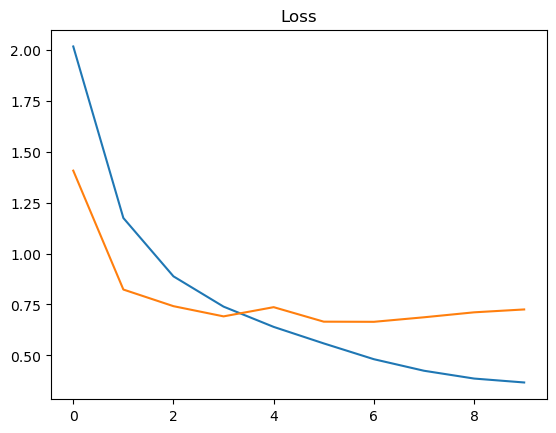

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.show()

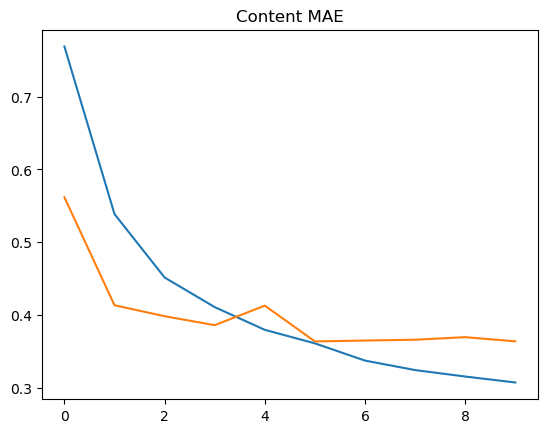

In [41]:
plt.plot(history.history['content_mae'])
plt.plot(history.history['val_content_mae'])
plt.title('Content MAE')
plt.show()

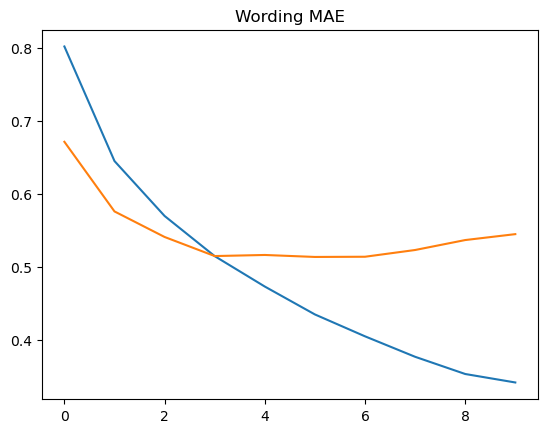

In [42]:
plt.plot(history.history['wording_mae'])
plt.plot(history.history['val_wording_mae'])
plt.title('Wording MAE')
plt.show()

# Cargando el modelo

In [43]:
from tensorflow.keras.models import load_model

model = load_model('rnn')